# Problem Statement -

- The objective of this project is to develop a predictive maintenance model for CNC or lathe machines using machine learning techniques to reduce downtime and maintenance costs. 
- The CNC or lathe machine is a critical component of manufacturing and industrial operations and requires regular maintenance to ensure optimal performance. 
- The primary objective is to predict the maintenance schedule and detect potential failures before they occur using sensor data, maintenance logs, and other relevant information. 
- The project aims to develop a model that accurately predicts the maintenance schedule, reducing the unplanned downtime, optimizing maintenance scheduling, and extending the lifespan of the CNC or lathe machine. 
- The project will also focus on identifying the critical factors that lead to machine failure and developing an efficient maintenance plan that reduces the overall maintenance cost while ensuring optimal machine performance. 
- The project will require developing, training, and testing the machine learning model using appropriate data sets, ensuring accuracy, and building a user-friendly interface for easy accessibility of the maintenance schedule. 
- The successful completion of this project will help manufacturing and industrial operations reduce their maintenance costs, improve their operational efficiency, and provide a better return on investment.

# 1) Import libraries/ Dipendancies -

In [2]:
# Importing libraries for Data Manipulation
import pandas as pd
import numpy as np

# Importing Libraries for file handling
import json
import pickle

# Libraries which are required for maodel training and Evaluation
from scipy.stats import zscore,mode
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import precision_score,recall_score,confusion_matrix,precision_recall_curve
from sklearn.metrics import accuracy_score,classification_report,f1_score,roc_curve
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier

# Importing warnings to filter warnings and ignore them
import warnings
warnings.filterwarnings("ignore")

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as ex
import matplotlib

# Importing ipython for maximum display of columns and rows
from IPython.display import display
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
%matplotlib inline

# Importing Libraries to generate pandas Profilling Report
import pandas_profiling
from collections import Counter

# 2) Data Gathering and Data Validitation -¶

For the data we have suffered a lot and finally we have got best data for the mechanical machines like lathe and cnc etc. then by using excel we performed Data quality checks of tthe data and also tried to get basic information from the data.

In [4]:
# Reading CSV File -
i0_pm_df = pd.read_csv("predictive_maintenance.csv")
i0_pm_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551.0,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408.0,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498.0,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,NaN,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,NaN,40.0,9,0,No Failure


# 3) EDA (Exploratory Data Analysis) -

In [ ]:
Steps Involved in EDA - 
    1) Information about Datset
    2) Describe Dataset
    3) Find Missing Values / Percentage of Missing Values
    4) Value Counts of Each Object Feature
    4) Desciding Encoding Types
    5) Outliers Detection
    6) Correlation with Target Feature
    7) VIF (Variance Inflation Factor)
    8) Status of Target Feature
    9) EDA report

## Information about Datset

In [3]:
# Checking information of dataset
i0_pm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   9994 non-null   float64
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 781.4+ KB


 Here we have got basic information about data like non null count, memory usage and Data type of Features.Here in the dataset there are missing values in Rotational speed [rpm]. there are 3 object features which are Product ID, Type, Failure Type and other feature are numerical.

## Describe Dataset

In [4]:
# Here we are printing Description of dataset and got all the stats of the numerical features.
i0_pm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.500000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.004930,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.005560,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],9994.0,1538.797579,179.321675,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.986910,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.951000,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.033900,0.180981,0.0,0.00,0.0,0.00,1.0


From above table we can clearly see that there are chances of outliers in Rotational speed [rpm],Torque [Nm] and in Tool wear [min]. these are  taken from the 75 percent polpulation value max vale 25 percent population value and minimum value. we can also figure ou there are continuous values in the UDI feature as there is data split in the each quantiles.

## Find Missing Values / Percentage of Missing Values

In [16]:
# Count of Missing Values in Each Numerical Feature 
i0_pm_df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     6
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [17]:
# Percentage of Missing Values in Each Numerical Feature
i0_pm_df.isna().mean() * 100

UDI                        0.00
Product ID                 0.00
Type                       0.00
Air temperature [K]        0.00
Process temperature [K]    0.00
Rotational speed [rpm]     0.06
Torque [Nm]                0.00
Tool wear [min]            0.00
Target                     0.00
Failure Type               0.00
dtype: float64

As we See above There are Missing values in Rotational speed [rpm] feature. Missing data within Rotational speed [rpm] would not be much damaging, but would still cause training errors. So we have to replace those values or drop those entries as those entries are not much in percentage of data.

- Rotational speed [rpm] Feature -

  - Values = 6
  - Percentage = 0.06%

## Value Counts of Each Object Feature

In [21]:
# Here we are checking separately for the Product ID feature as it contains all unique values.
i0_pm_df["Product ID"].nunique()

10000

In [22]:
# Checking for the shape of the DataFrame
i0_pm_df.shape

(10000, 10)

So there are total 10000 datapoints in the table and unique values count of the Product ID feature is 10000. There are all unique values in the feature Product ID so we can drop it.

In [24]:
# Here we are checking for the Value counts of each Object datatype features other than Product ID feature.
columns = i0_pm_df.select_dtypes(include="object").drop("Product ID",axis=1).columns.to_list()
for feature in columns:
    print("Column Name - ",feature)
    print(i0_pm_df[feature].value_counts().sort_values(ascending=False))
    print()

Column Name -  Type
L    6000
M    2997
H    1003
Name: Type, dtype: int64

Column Name -  Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64



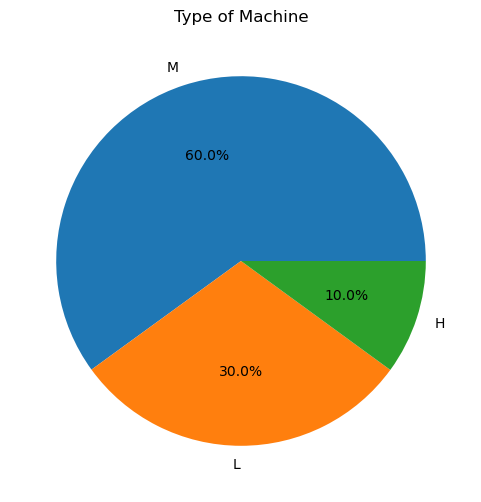

In [36]:
# Pie plot of Value counts in the feature Type
fig = plt.figure(figsize=(6,6))
line1 = plt.pie(i0_pm_df["Type"].value_counts(),labels = i0_pm_df["Type"].unique(),autopct="%1.1f%%")
plt.title('Type of Machine')
plt.show()

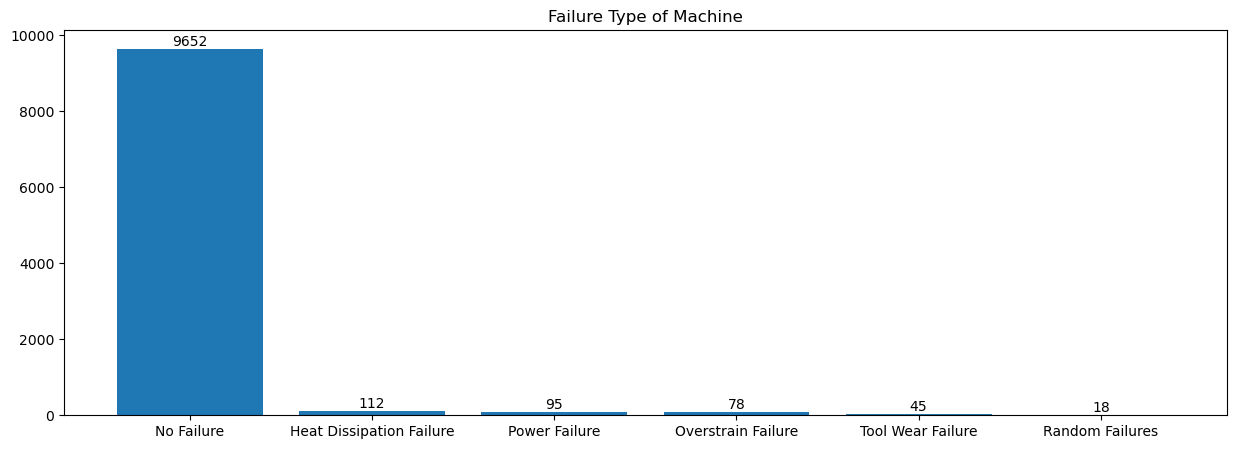

In [41]:
# Bar graph of Value counts in the feature Failure Type
fig, ax = plt.subplots()
ax.figure.set_size_inches(15,5)
dict1 = i0_pm_df["Failure Type"].value_counts().to_dict()
x1 = list(dict1.keys())
y1 = list(dict1.values())
plt.bar(x1,y1)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Failure Type of Machine')
plt.show()

Targetting 2 Object Datatype feature which are Type and Failure Type. We are checking for distribution of Data from Those Features.
- Column Name - Type
  - M = 6000 (60.00%)
  - L = 2997 (30.00%)
  - H = 1003 (10.00%)
- Column Name - Failure Type
  - No Failure = 9652
  - Heat Dissipation Failure = 112
  - Power Failure = 95
  - Overstrain Failure = 78
  - Tool Wear Failure = 45
  - Random Failures = 18

## Desciding Encoding Types

In [42]:
# Checking for any sequence is the object columns so we can select encoding techniques.
cols = i0_pm_df.select_dtypes(include="object").columns.to_list()
for feature in cols:
    print("Column Name - ",feature)
    print(i0_pm_df[feature].unique())
    print()

Column Name -  Product ID
['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']

Column Name -  Type
['M' 'L' 'H']

Column Name -  Failure Type
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']



- Here we can clearely see there is no any precedence or sequence in the Product ID Feature and having all unique entities so we can drop it.

- Features for OneHotEncoding / Get Dummies - Type
  - Here we can clearely see there is no precedence or sequence in the Type Feature so we have to use either or OneHotEncoding / Get Dummies function.

- Features for Label Encoding - Failure Type
  - As there are numerical values in the Failure Type feature i.e Target Feature so we require need of Label Encoding Technique
  - As there are numerical values in the Target feature i.e Target Feature so we doesnt require need of Label Encoding Technique

# Outliers Detection

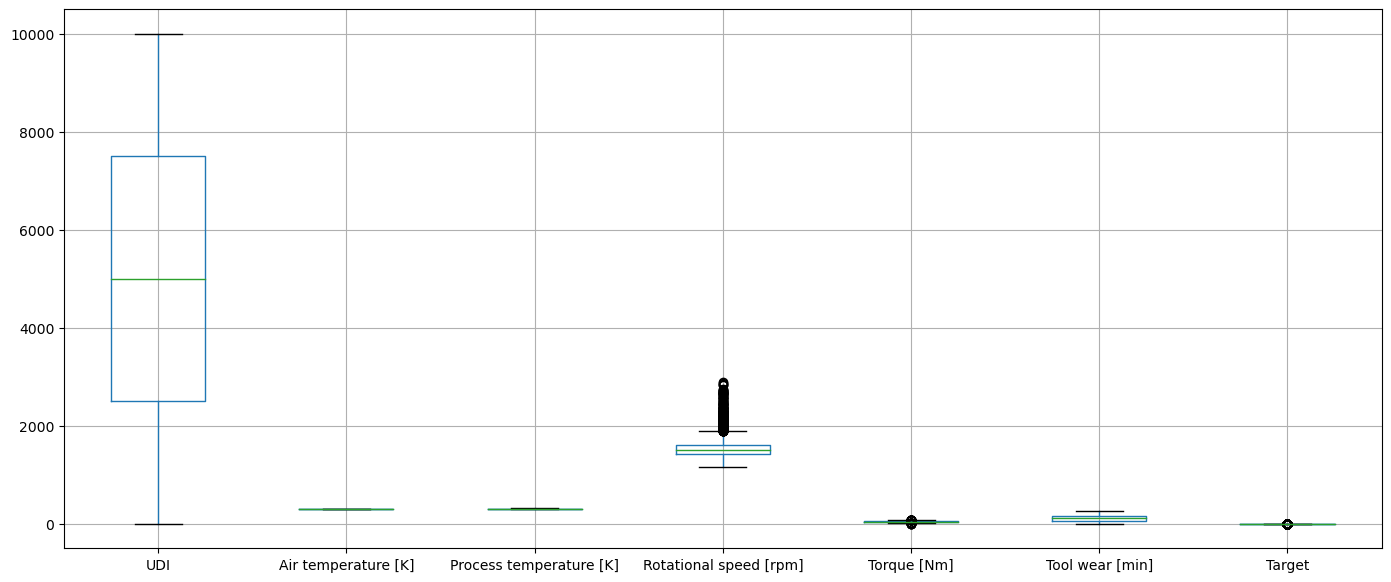

In [8]:
# Here we can see there ae outliers in the every feature
plt.figure(figsize=(17,7))
i0_pm_df.boxplot()
plt.show()

Here we can clearly see the outliers in the Torque [Nm] and Rotational speed [rpm] features, so we have to check for those columns Separately. We have to check especially for Rotational speed [rpm] and Torque [Nm] features because there are outliers in that feature at a first glance.

### UDI Feature

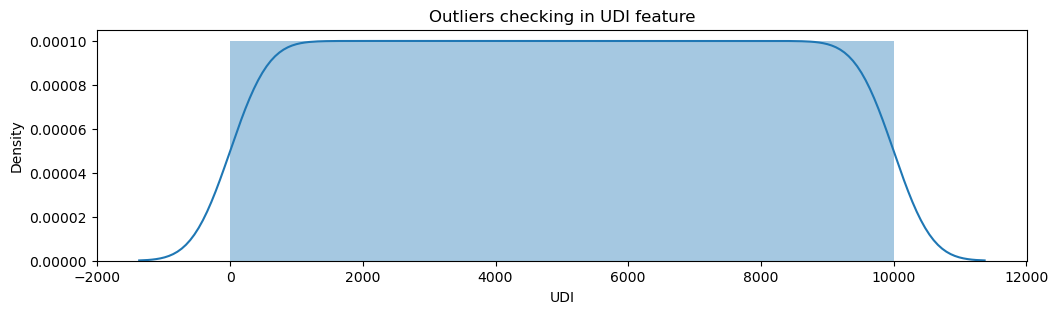

In [19]:
# Checking of outliers in UDI Feature using distplot
plt.figure(figsize=(12,3))
sns.distplot(i0_pm_df["UDI"])
plt.title("Outliers checking in UDI feature")
plt.show()

We can clearly see the density distribution so curve is Normally distributed and there are no-outliers and due to all unique values we can drop it.

### Air temperature [K]

In [24]:
# Count of outliers in Air temperature [K] by using Z-score method
z = zscore(i0_pm_df["Air temperature [K]"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in Air temperature [K] - {len(z1)}")

Count of Outliers in Air temperature [K] - 0


Here we can say practically there are no outliers present in Air temperature [K] feature.

### Process temperature [K]

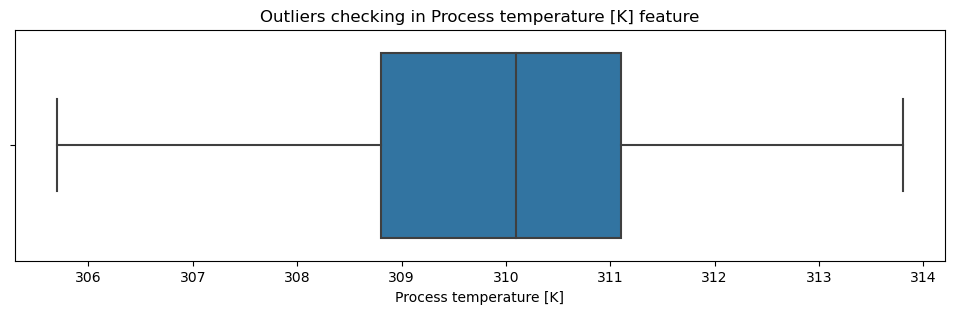

In [39]:
# Checking of outliers in Process temperature [K] Feature
plt.figure(figsize=(12,3))
sns.boxplot(x=i0_pm_df["Process temperature [K]"])
plt.title("Outliers checking in Process temperature [K] feature")
plt.show()

we can see there are no outliers in the Process temperature [K] feature.

### Rotational speed [rpm]

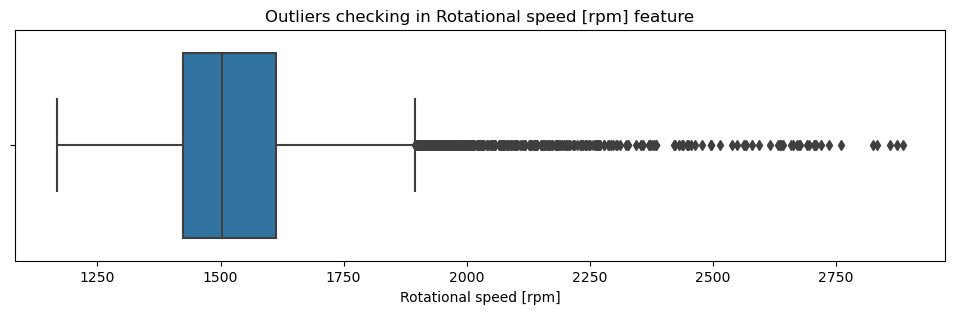

In [40]:
# Count of outliers in Rotational speed [rpm] by using boxplot method
plt.figure(figsize=(12,3))
sns.boxplot(x=i0_pm_df["Rotational speed [rpm]"])
plt.title("Outliers checking in Rotational speed [rpm] feature")
plt.show()

In [35]:
# Count of outliers in Rotational speed [rpm] by using Z-score method
z = zscore(i0_pm_df["Rotational speed [rpm]"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in Rotational speed [rpm] - {len(z1)}")

Count of Outliers in Rotational speed [rpm] - 0


In [36]:
# Count of Outliers using iqr method to crosscheck the above result.
q1 = i0_pm_df["Rotational speed [rpm]"].quantile(0.25)
q3 = i0_pm_df["Rotational speed [rpm]"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
print(f"Upper tail - {upper_tail}\nLower tail - {lower_tail}")
count = i0_pm_df.loc[(i0_pm_df["Rotational speed [rpm]"] > upper_tail) | (i0_pm_df["Rotational speed [rpm]"] < lower_tail)].shape[0]
print(f"Count of Outliers in Rotational speed [rpm] - {count}")

Upper tail - 1895.5
Lower tail - 1139.5
Count of Outliers in Rotational speed [rpm] - 418


Rotational speed [rpm] in this column there are 418 outliers by IQR method and using boxplot there are outliers in this Feature. We have to either replace those outlliers or reduce the impact of those.

### Torque [Nm]

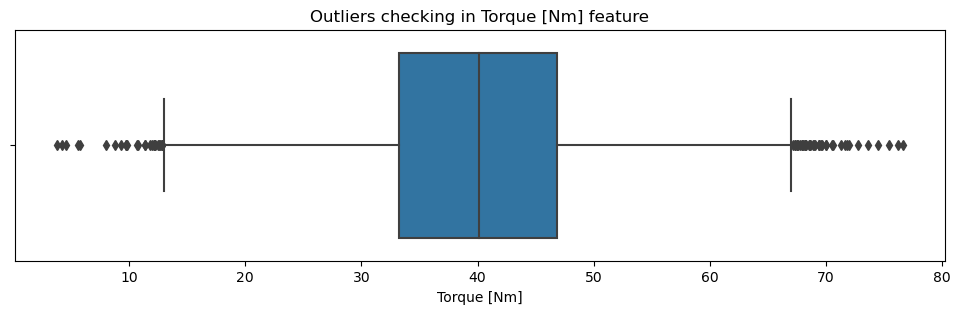

In [43]:
# Checking of outliers in Torque [Nm] Feature
plt.figure(figsize=(12,3))
sns.boxplot(x = i0_pm_df["Torque [Nm]"])
plt.title("Outliers checking in Torque [Nm] feature")
plt.show()

In [29]:
# Count of outliers in person_emp_length by using Z-score method, here z-score is showing
z = zscore(i0_pm_df["Torque [Nm]"]).to_list()
z1 = []
for i in z:
    if i > 3 or i < -3:
        z1.append(i)
print(f"Count of Outliers in Torque [Nm] - {len(z1)}")

Count of Outliers in person_emp_length - 0


In [44]:
# Count of Outliers using iqr method to crosscheck the above result.
q1 = i0_pm_df["Torque [Nm]"].quantile(0.25)
q3 = i0_pm_df["Torque [Nm]"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
print(f"Upper tail - {upper_tail}\nLower tail - {lower_tail}")
count = i0_pm_df.loc[(i0_pm_df["Torque [Nm]"] > upper_tail) | (i0_pm_df["Torque [Nm]"] < lower_tail)].shape[0]
print(f"Count of Outliers in Torque [Nm] - {count}")

Upper tail - 67.19999999999999
Lower tail - 12.800000000000011
Count of Outliers in Torque [Nm] - 69


Torque [Nm] in this column there are 69 outliers by IQR method and using boxplot there are outliers in this Feature. We have to either replace those outlliers or reduce the impact of those.

### Tool wear [min]

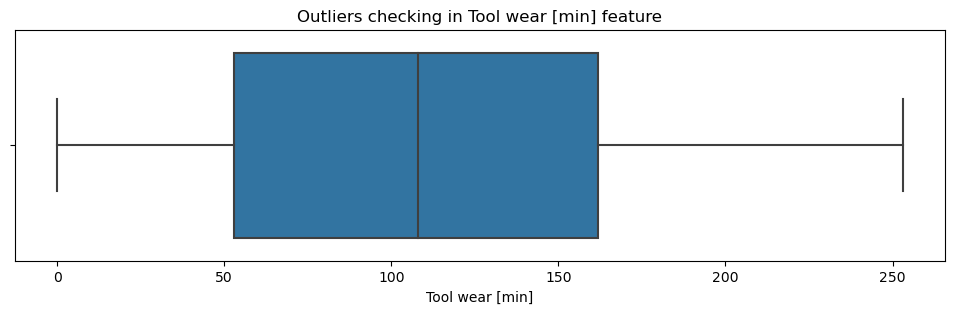

In [46]:
# Checking of outliers in Tool wear [min] Feature
plt.figure(figsize=(12,3))
sns.boxplot(x = i0_pm_df["Tool wear [min]"])
plt.title("Outliers checking in Tool wear [min] feature")
plt.show()

we can see there are no outliers in the Tool wear [min] feature.

### Correlation with Target Feature

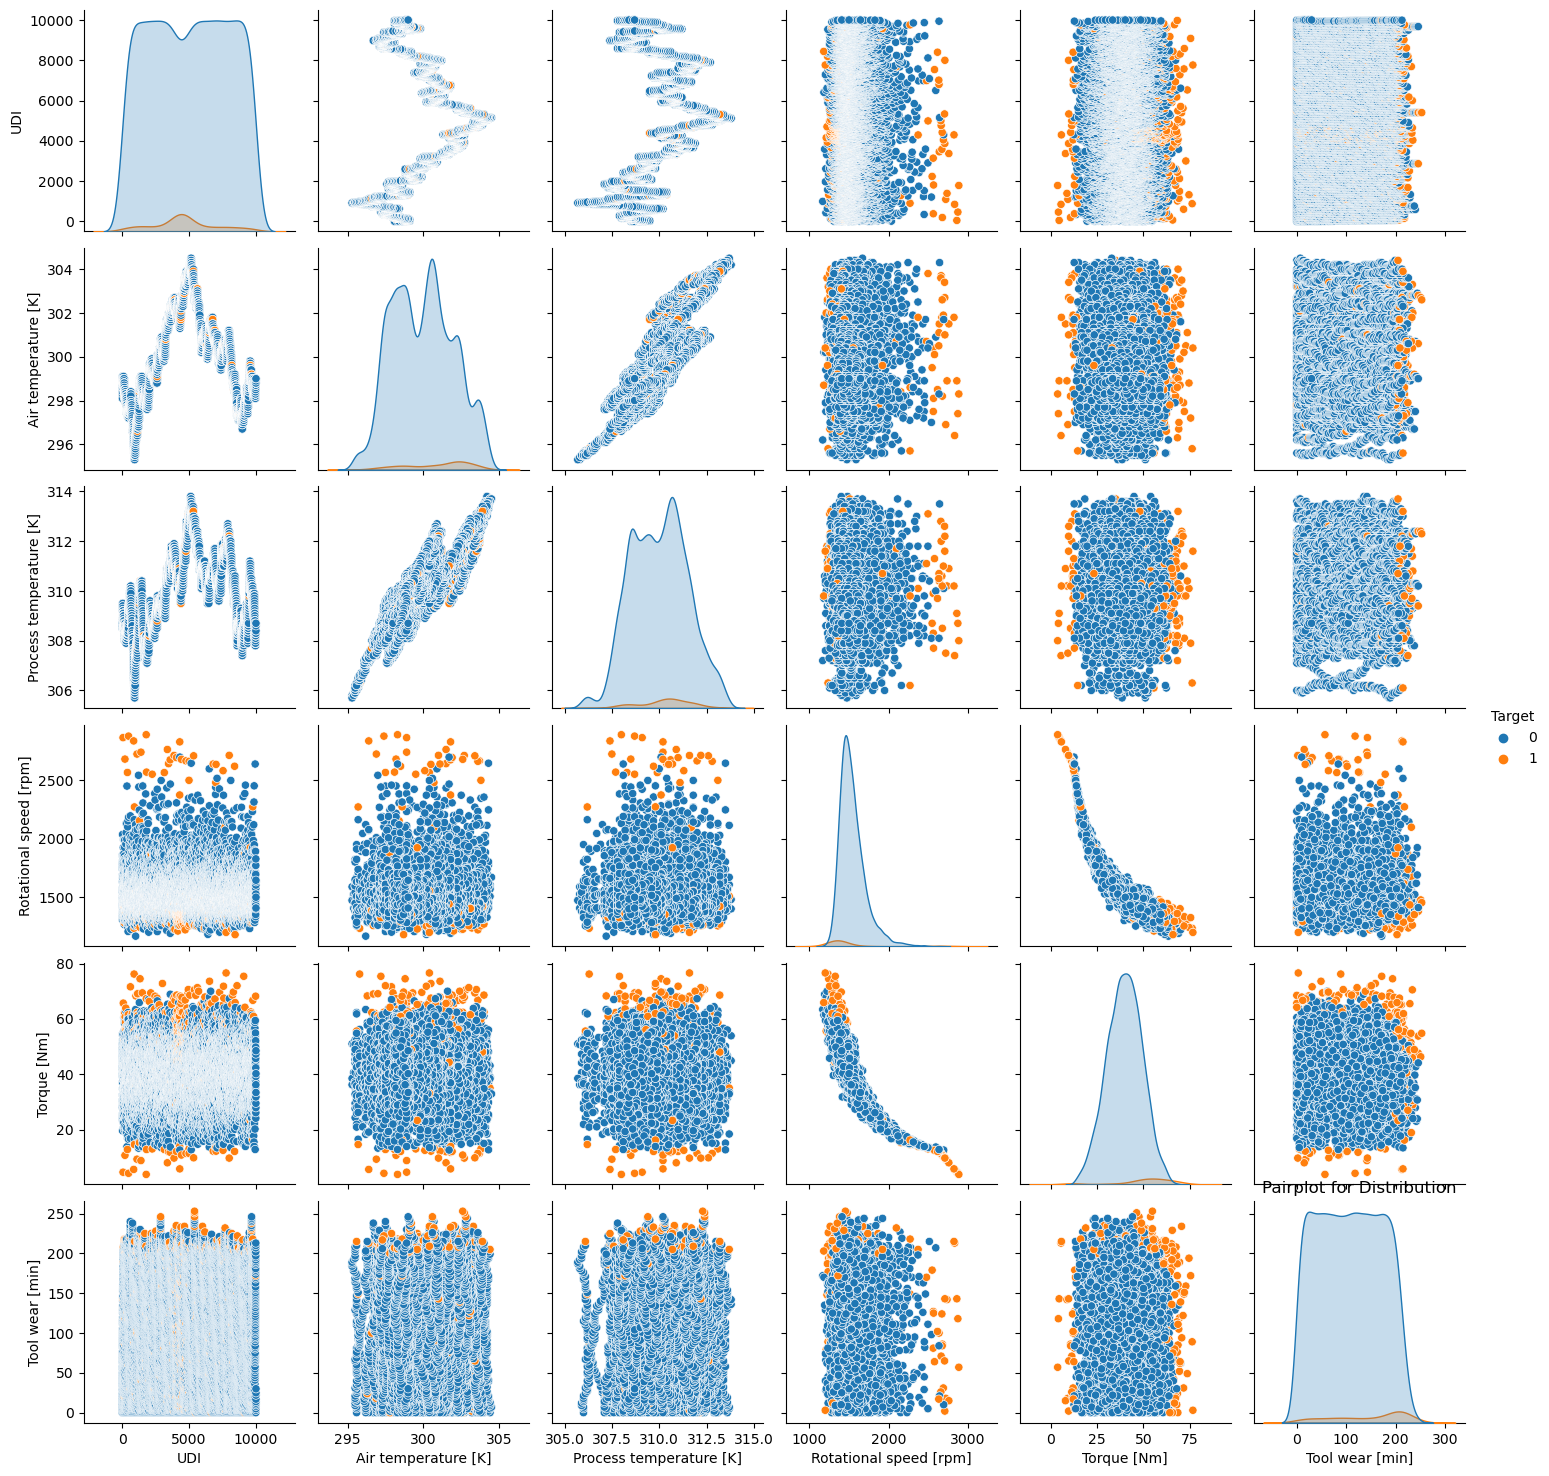

In [51]:
# Pairplot for Distribution
sns.pairplot(i0_pm_df,hue="Target")
plt.title("Pairplot for Distribution")
plt.show()

In [52]:
# Checking for correlation of independent feature with dependent features and and we are not getting good correlation.
i0_pm_df.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117428,0.324428,-0.006829,0.003207,-0.010702,-0.022892
Air temperature [K],0.117428,1.000000,0.876107,0.022564,-0.013778,0.013853,0.082556
Process temperature [K],0.324428,0.876107,1.000000,0.019170,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.006829,0.022564,0.019170,1.000000,-0.875079,0.000027,-0.044214
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875079,1.000000,-0.003093,0.191321
Tool wear [min],-0.010702,0.013853,0.013488,0.000027,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044214,0.191321,0.105448,1.000000


In [6]:
# Checking for correlation
df2 = i0_pm_df.corr().iloc[6,:].to_frame().T
df2

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Target,-0.022892,0.082556,0.035946,-0.044214,0.191321,0.105448,1.0


<Figure size 800x700 with 0 Axes>

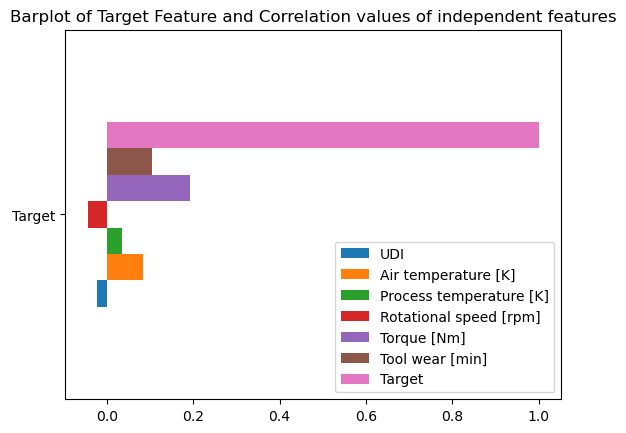

In [7]:
# bar plot of correlation of Target feature with respect to all independent features. 
plt.figure(figsize=(8,7))
df2.plot(kind="barh")
plt.title("Barplot of Target Feature and Correlation values of independent features")
plt.show()

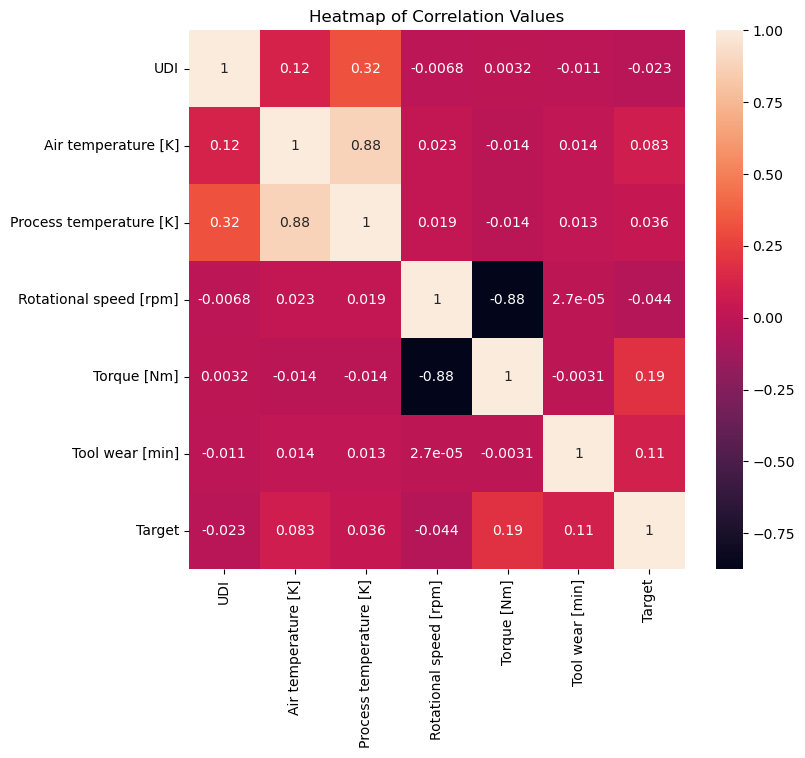

In [9]:
# Heatmap for correlation Values
plt.figure(figsize=(8,7))
sns.heatmap(i0_pm_df.corr(),annot=True)
plt.title("Heatmap of Correlation Values")
plt.show()

Range of Good correlation/Predictors is -0.7 to -1 for negative correlation and 0.7 to 1 for positive correlation. from above table,heatmap and horrizontal Bar graph there is no one feature which is best Describing the target Feature and almost all features having Worst correlation. which is in between -0.3 to 0.3.

### VIF (Variance Inflation Factor)

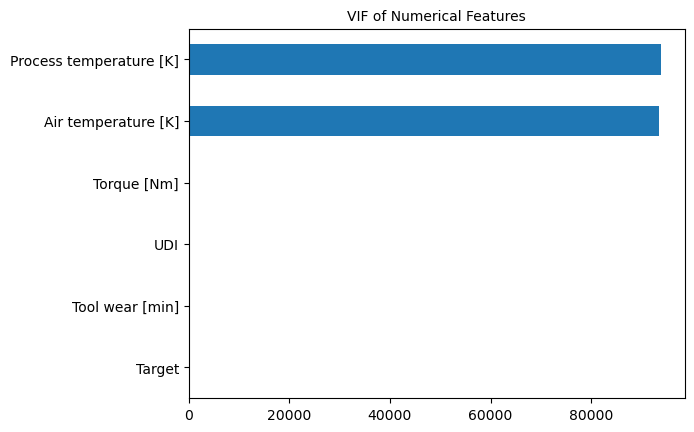

In [17]:
 #Checking for relation between independent features. Here im dropping Features having null values
x = i0_pm_df.select_dtypes(exclude="object").drop("Rotational speed [rpm]",axis = 1)
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
x1 = pd.Series(vif_list,index=x.columns)
x1.sort_values().plot(kind="barh")
plt.title("VIF of Numerical Features",fontsize=10)
plt.show()

Variance inflation factors range is 0 to infinity. 0 to 5 vif score it suggests that there is no correlation between other independent features. If VIF sore is more than 5 then we cut off that feature but in this case most of the features are above vif range so we are not removing any feature. As there is highest VIF value of Process Temprature [K] and Air Temprature [K] also there is R value 0.88 for both the features those are highly correlated with each other. as per information of above we can drop this two features.

### Status of Target Feature

First of all We dont require label encoding beacuse Target column is actually in numerical datatype.In the case of Failure Type we require the label encoding. In this case 0 is No failure in the machine and 1 is Failure in machine.

In [19]:
# Checking for Value counts of loan_status feature
i0_pm_df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

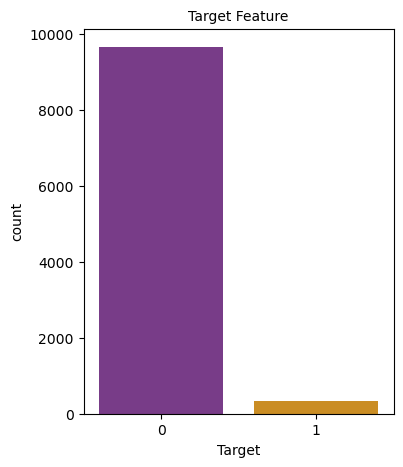

In [27]:
# Countplot of loan Status Feature
plt.figure(figsize=(4,5))
sns.countplot(x = i0_pm_df["Target"], palette='CMRmap')
plt.title("Target Feature",fontsize=10)
plt.show()

So here we also got to know that there is bias in the categories so we have to perform sampling on it. Major category contains nearly 95 percent of data in the No failure category and minor category contains 5 percent data in failure of machine Category.

- Number of No Failure Machines: Equivalent to 5 % of the total Machines
- Number of Failure Machines: Equivalent to 95 % of the total Machines

There is colinearity between two target features so we are going to drop one target feature -
- Target is highly overall correlated with Failure Type
- Failure Type is highly overall correlated with Target

All Insights from EDA -
- `Product ID` has a high cardinality: 10000 distinct values
- `Air temperature [K]` is highly overall correlated with `Process temperature [K]`
- `Process temperature [K]` is highly overall correlated with `Air temperature [K]`
- `Rotational speed [rpm]` is highly overall correlated with `Torque [Nm]`
- `Torque [Nm]` is highly overall correlated with Rotational `speed [rpm]`
- `Target` is highly overall correlated with `Failure Type`
- `Failure Type` is highly overall correlated with `Target`
- `Target` is highly imbalanced (78.6%)
- `Failure Type` is highly imbalanced (88.7%)
- `UDI` is uniformly distributed
- `Product ID` is uniformly distributed
- `UDI` has unique values
- `Product ID` has unique values
- `Tool wear [min]` has 120 (1.2%) zeros

### EDA Report using Pandas Profilling

In [5]:
# Creating pandas Profiling Report
pf = pandas_profiling.ProfileReport(i0_pm_df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Saving Pandas Profilling Report in the html format.
pf.to_file("EDA Report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 4) Making Hypothesis for Testing

Defining Hypothesis features wise by taking consideration the insights of above EDA part - 
Here we are not taking UDI and Product ID Features in the consideration as they all contains Unique values.
- Type -
  - There are more cases of Failure for High Product Quality than Medium and Low Product Quality.
- Air temperature [K] -
  - More the Air temperature [K] Higher the failure cases.
- Process temperature [K] -
  - Higher the Process temperature [K] then higher the failure cases.
- Rotational speed [rpm] -
  - Lower the Rotational speed [rpm] then there are less chances of failure. 
- Torque [Nm] -
  - Lower the Torque [Nm] then there are less chances of failure.
- Tool wear [min] -
  - Higher the Tool wear time in minute there are more chances of failure.

# Hypothesis Testing

## Univariate Analysis -

### Numerical Variables -

In [10]:
# creating a dataset for numerical attributes/features
num = i0_pm_df.select_dtypes(include=['int64', 'float64'])
num.head()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,298.1,308.6,1551.0,42.8,0,0
1,2,298.2,308.7,1408.0,46.3,3,0
2,3,298.1,308.5,1498.0,49.4,5,0
3,4,298.2,308.6,NaN,39.5,7,0
4,5,298.2,308.7,NaN,40.0,9,0


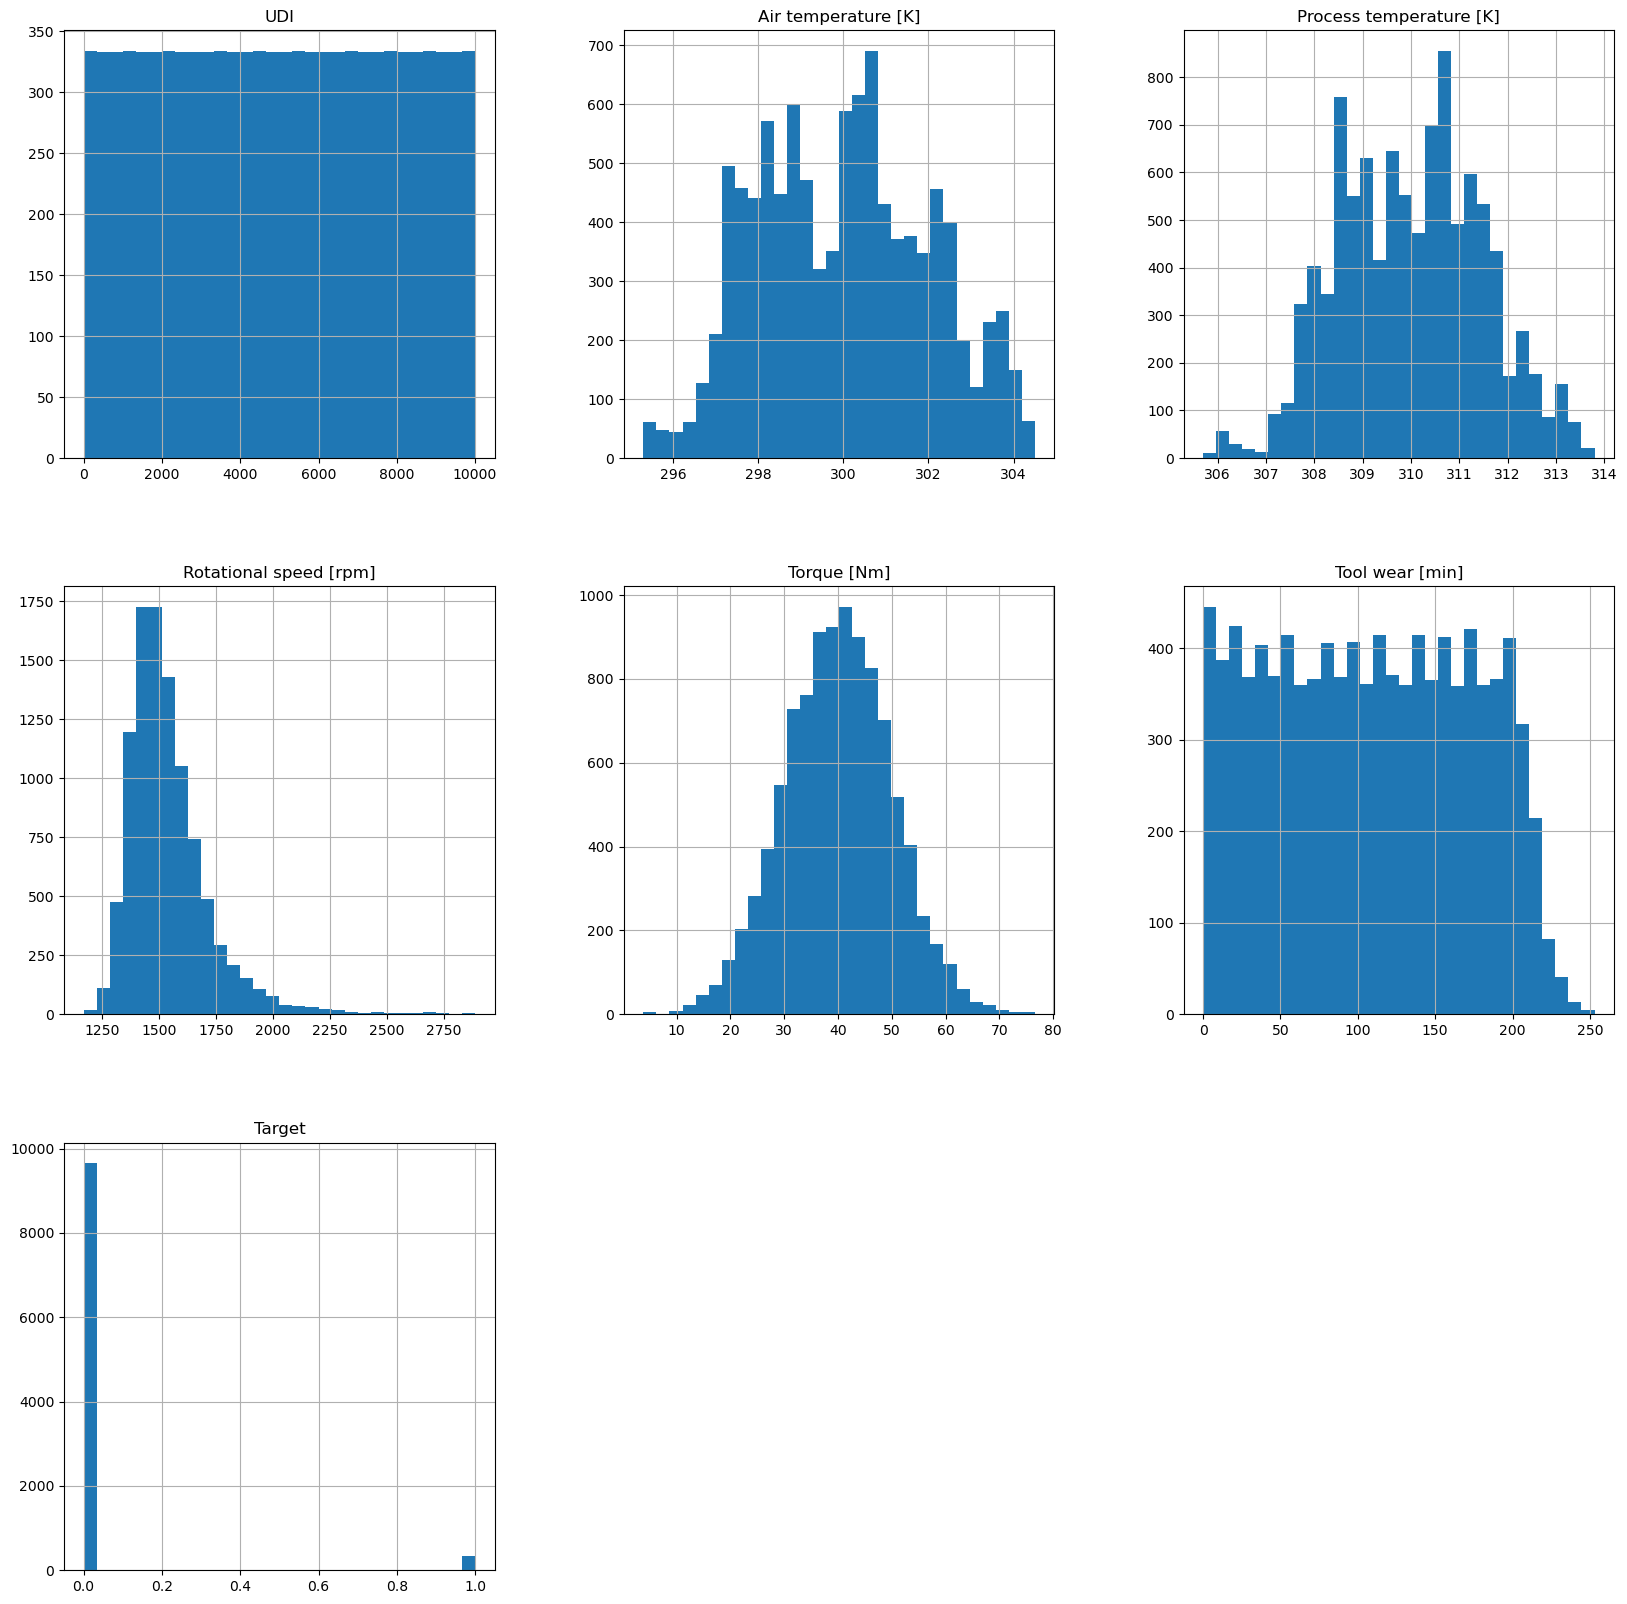

In [11]:
# plots a histogram for all numerical attributes
_ = num.hist(bins=30,figsize=(20,20))

As we can observe, there is one variable that presents a normal distribution. There is normal distibution in Torque[NM] and udi feature having equal frequemcy distribution. Note that here, we're only exploring the data, not making any handling or transformation.

### Categorical Variables -

In [5]:
# Creating a dataset for Categorical Features -
catego = i0_pm_df.select_dtypes(include="object")
catego.head()

,Product ID,Type,Failure Type
0,M14860,M,No Failure
1,L47181,L,No Failure
2,L47182,L,No Failure
3,L47183,L,No Failure
4,L47184,L,No Failure


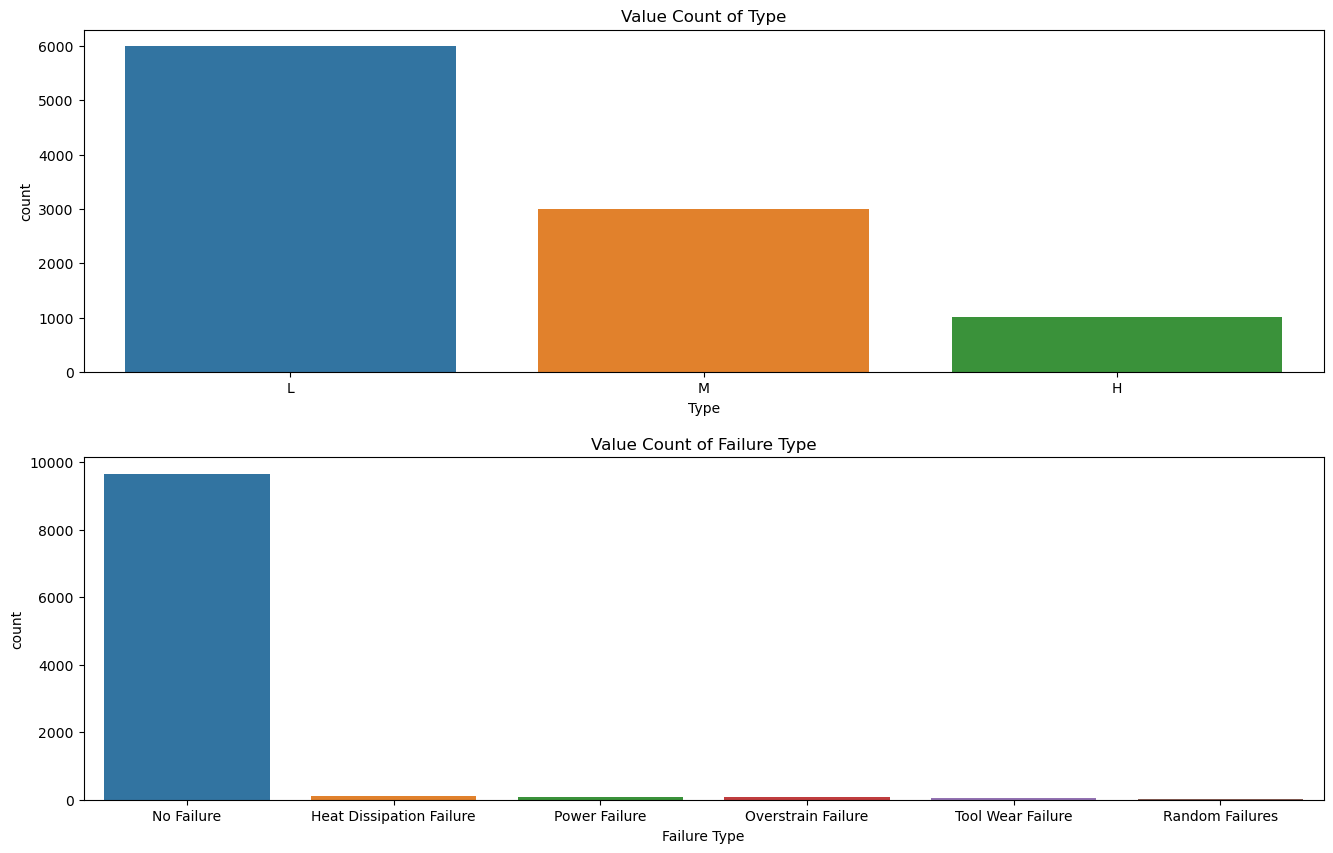

In [36]:
# Charts to show Distribution or count of unique values in Categorical featues.
# We have not taken Product id because it contains all unique values.
fig, ax = plt.subplots()
ax.figure.set_size_inches(16,10)

plt.subplot(2,1,1)
sns.countplot(x=catego["Type"],order=catego["Type"].value_counts().index)
plt.title("Value Count of Type")

plt.subplot(2,1,2)
sns.countplot(x=catego["Failure Type"],order=catego["Failure Type"].value_counts().index)
plt.title("Value Count of Failure Type")

plt.subplots_adjust(hspace = 0.25)
plt.subplots_adjust(wspace = 0.25)
plt.show()

## Bivariate analysis - Hypothesis Validation¶

#### 1) There are more cases of Failure for High Product Quality than Medium and Low Product Quality -

In [6]:
# Creating separate data frame for Failure cases -
i1_pm_df = i0_pm_df.groupby("Target").get_group(1)

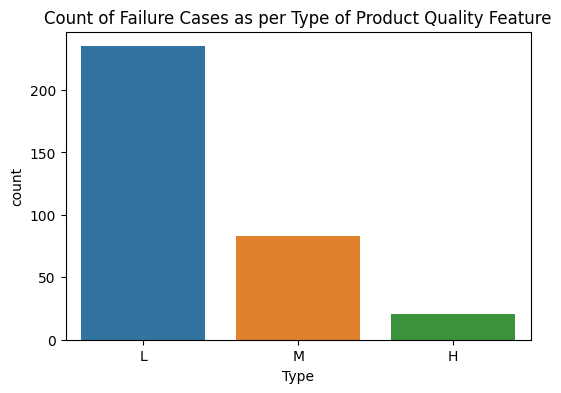

In [33]:
# count plot of Value counts in the Type of Product Quality feature
fig, ax = plt.subplots()
ax.figure.set_size_inches(6,4)

sns.countplot(x=i1_pm_df["Type"])
ax.set_title("Count of Failure Cases as per Type of Product Quality Feature", fontsize=12)
plt.show()

As we can see there are more cases of failure for the Low Product Quality and its followed bu Medium and High product Quality. 
- Thus Hypothesis is `False`

So, Here we are accepting Alternate Hypothesis. Thats why Failure cases are more for Low Product Quality and its followed bu Medium and High product Quality.

#### 2) More the Air temperature [K] Higher the failure cases - 

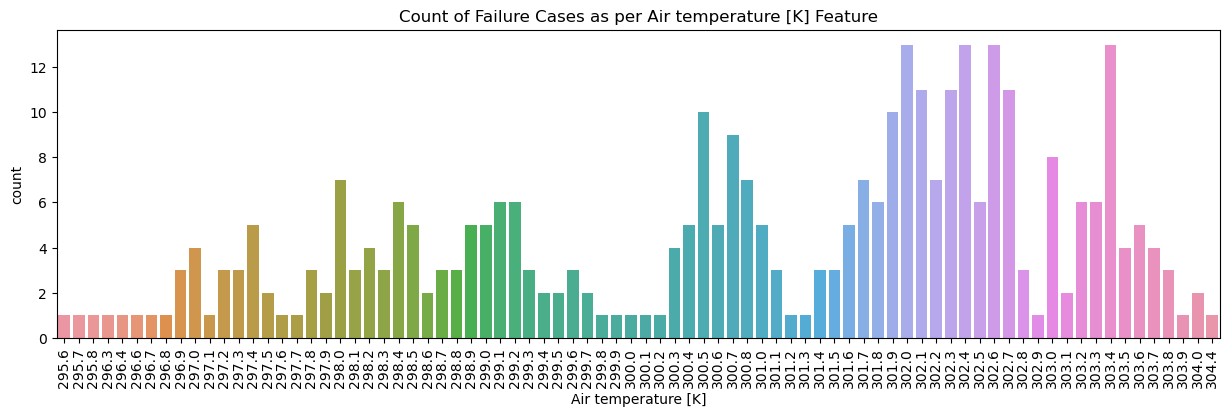

In [60]:
# count plot of Value counts in the Air temperature [K] feature
fig, ax = plt.subplots()
ax.figure.set_size_inches(15,4)
plt.xticks(rotation=90)
sns.countplot(x=i1_pm_df["Air temperature [K]"])
ax.set_title("Count of Failure Cases as per Air temperature [K] Feature", fontsize=12)
plt.show()

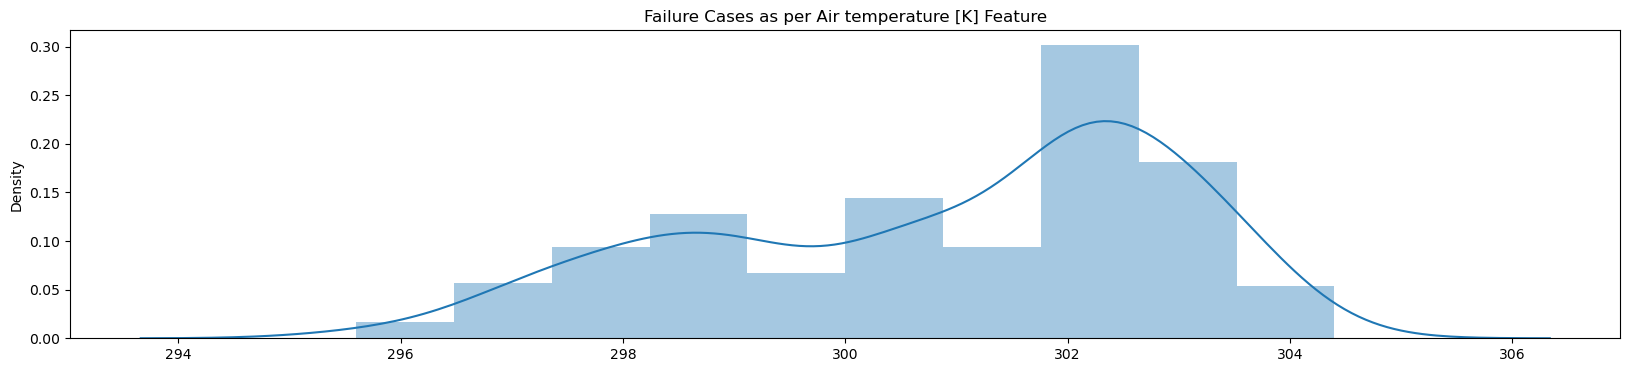

In [6]:
# distplot of Value counts in the Air temperature [K] feature
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,4)
sns.distplot(x=i1_pm_df["Air temperature [K]"])
ax.set_title("Failure Cases as per Air temperature [K] Feature", fontsize=12)
plt.show()

As we can see frequency of failure cases is higher for higher Air temperature [K].

- Thus Hypothesis is `True`

#### 3) Higher the Process temperature [K] then higher the failure cases - 

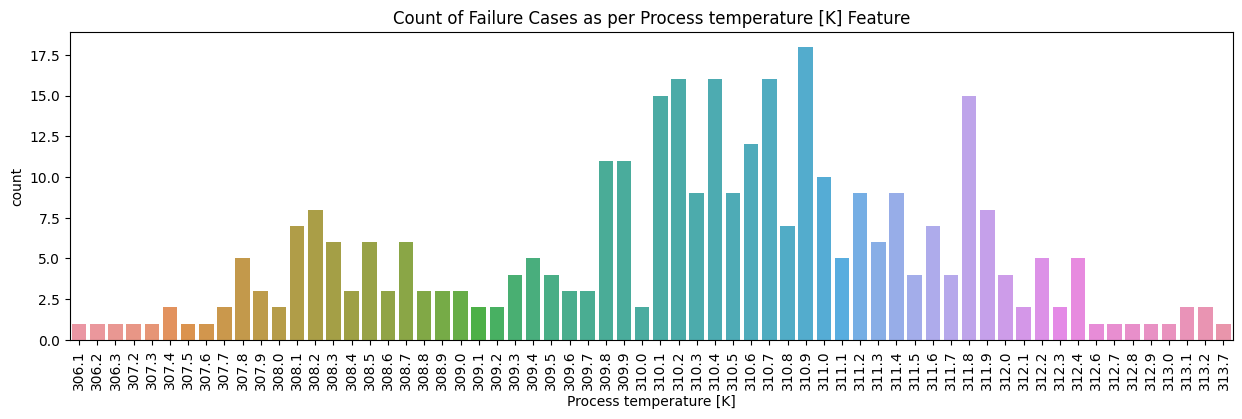

In [8]:
# count plot of Value counts in the Air temperature [K] feature  
fig, ax = plt.subplots()
ax.figure.set_size_inches(15,4)
plt.xticks(rotation=90)
sns.countplot(x=i1_pm_df["Process temperature [K]"])
ax.set_title("Count of Failure Cases as per Process temperature [K] Feature", fontsize=12)
plt.show()

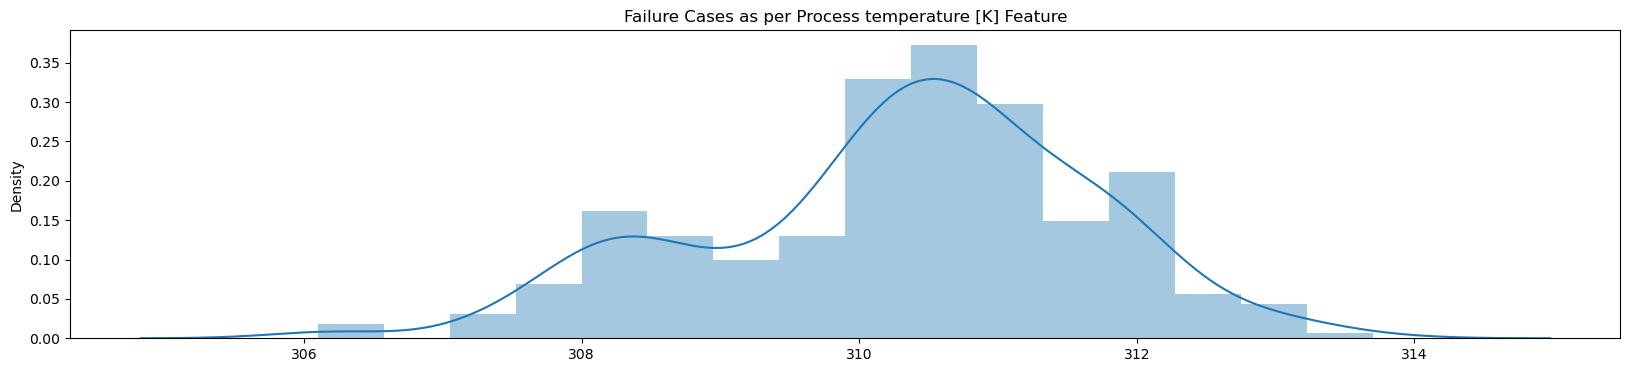

In [8]:
# distplot of Value counts in the Process temperature [K] feature
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,4)
sns.distplot(x=i1_pm_df["Process temperature [K]"])
ax.set_title("Failure Cases as per Process temperature [K] Feature", fontsize=12)
plt.show()

As we can see There are more cases of Failure of machine for temperature in range 310.1 to 311.8 [k].

- Thus our Hypothesis is `False`

Here we are taking Alternate Hypothesis. There are more cases of failure for middle temperature range.

#### 4) Lower the Rotational speed [rpm] then there are less chances of failure -

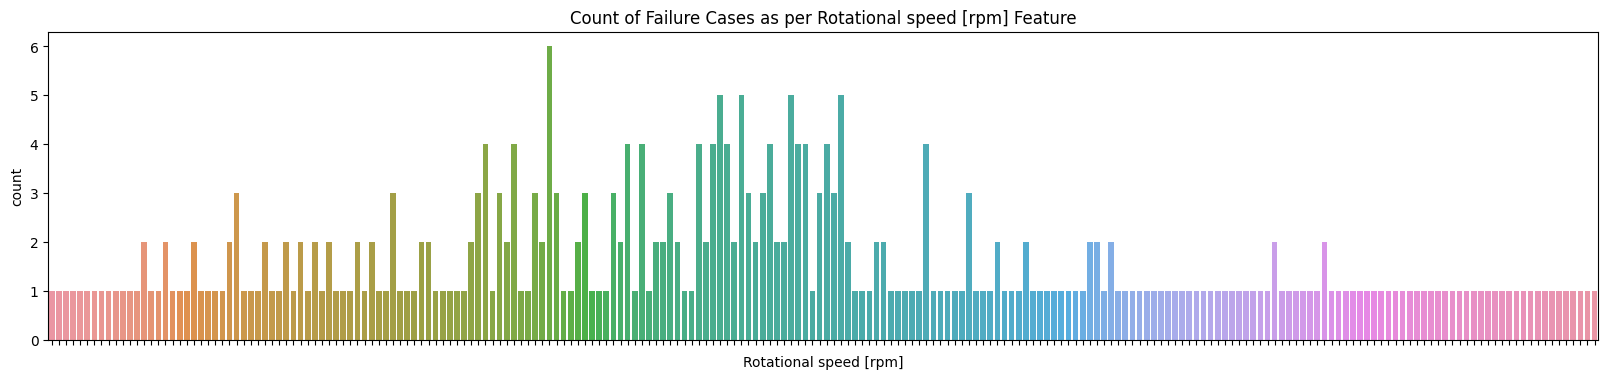

In [14]:
# countplot of Value counts in the Rotational speed [rpm] feature
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,4)
plt.xticks(rotation=90)
sns.countplot(x=i1_pm_df["Rotational speed [rpm]"]).set(xticklabels=[])
ax.set_title("Count of Failure Cases as per Rotational speed [rpm] Feature", fontsize=12)
plt.show()

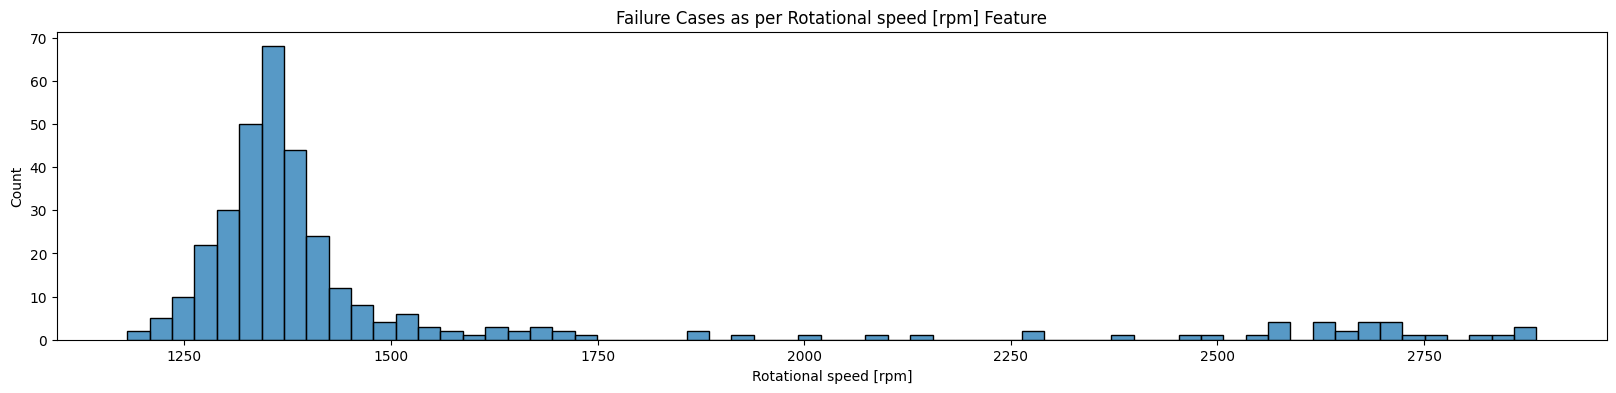

In [30]:
# histplot of Value counts in the Rotational speed [rpm] feature
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,4)
sns.histplot(x=i1_pm_df["Rotational speed [rpm]"])
ax.set_title("Failure Cases as per Rotational speed [rpm] Feature", fontsize=12)
plt.show()

we can see from the chart there are maximum cases of failure with lower Rotational speed [rpm]. 

- Thus our Hypothesis is `False`.

#### 5) Lower the Torque [Nm] then there are less chances of failure -

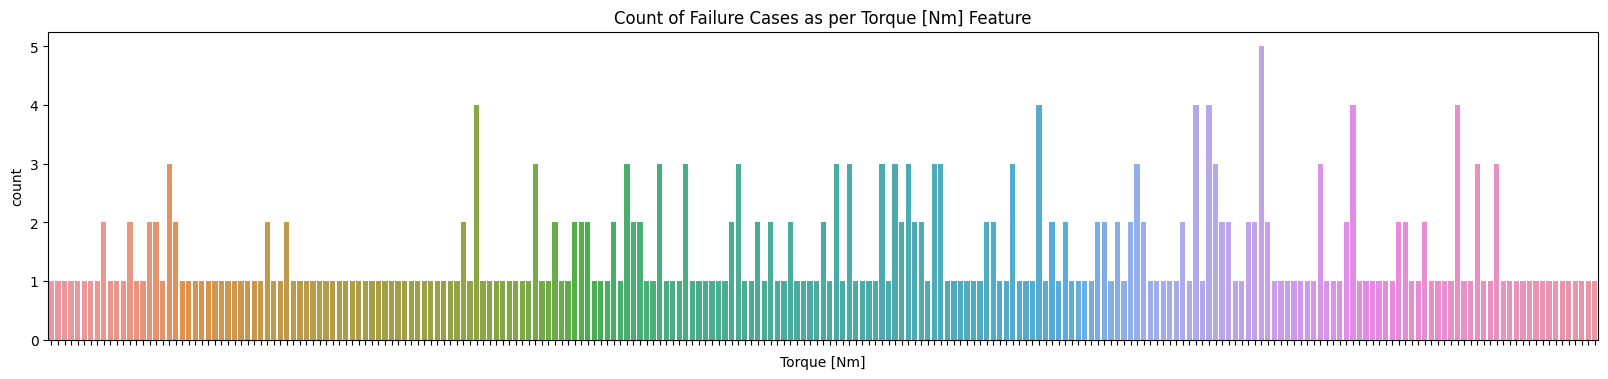

In [18]:
# countplot of Value counts in the Torque [Nm] feature
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,4)
plt.xticks(rotation=90)
sns.countplot(x=i1_pm_df["Torque [Nm]"]).set(xticklabels=[])
ax.set_title("Count of Failure Cases as per Torque [Nm] Feature", fontsize=12)
plt.show()

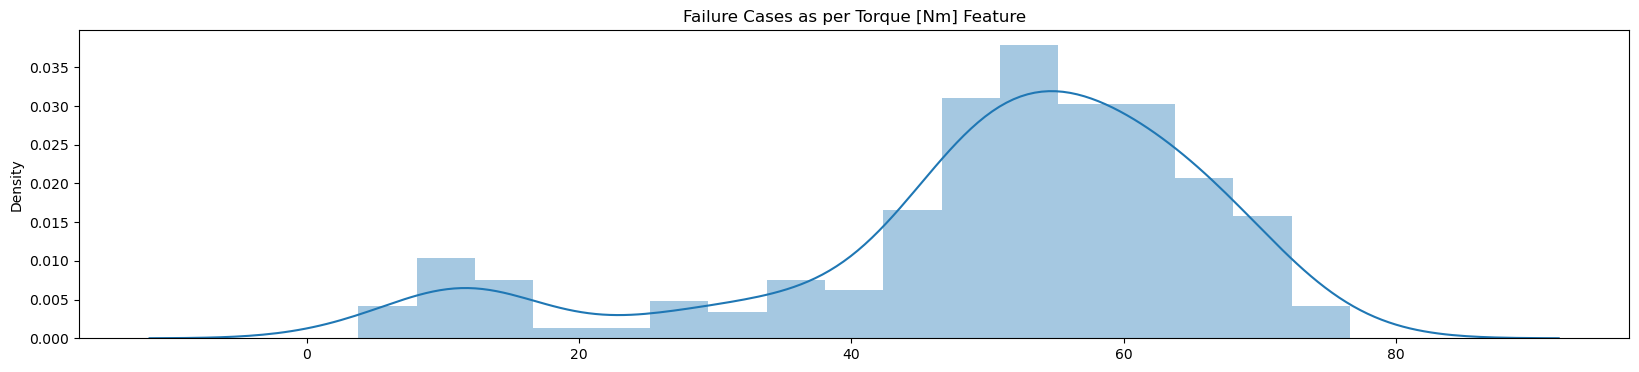

In [7]:
# distplot of Value counts in the Torque [Nm] feature
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,4)
sns.distplot(x=i1_pm_df["Torque [Nm]"])
ax.set_title("Failure Cases as per Torque [Nm] Feature", fontsize=12)
plt.show()

From above Graph There are comparatively less cases of Failure of machine for Less Torque [Nm]. 
- Thus Hypothesis is `True`.

#### 6) Higher the tool wear time in minute there are more chances of failure -

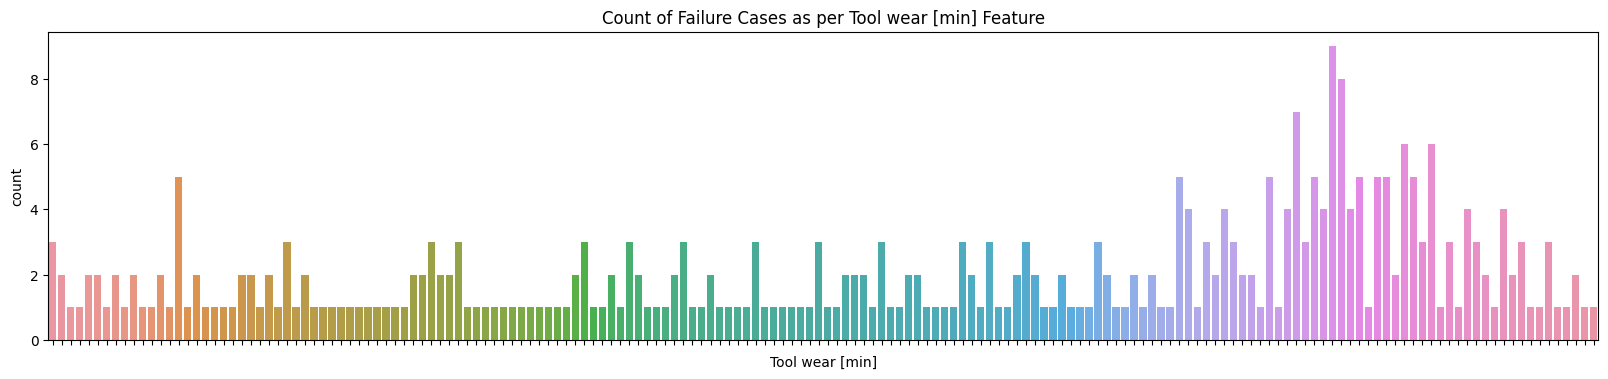

In [23]:
# countplot of Value counts in the Tool wear [min] feature
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,4)
plt.xticks(rotation=90)
sns.countplot(x=i1_pm_df["Tool wear [min]"]).set(xticklabels=[])
ax.set_title("Count of Failure Cases as per Tool wear [min] Feature", fontsize=12)
plt.show()

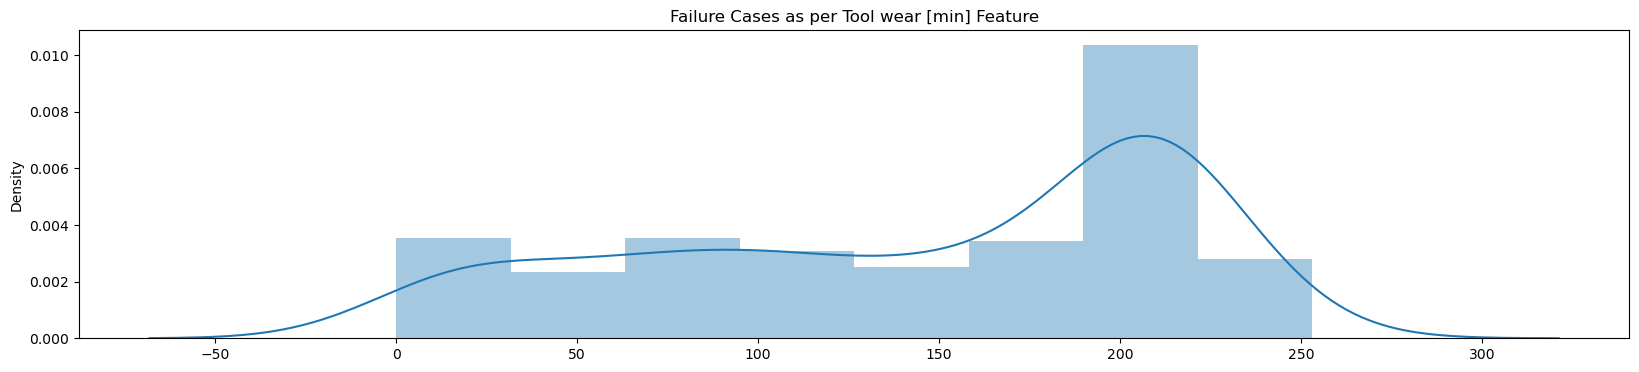

In [9]:
# distplot of Value counts in the Tool wear [min] feature
fig, ax = plt.subplots()
ax.figure.set_size_inches(20,4)
sns.distplot(x=i1_pm_df["Tool wear [min]"])
ax.set_title("Failure Cases as per Tool wear [min] Feature", fontsize=12)
plt.show()

From above graph we see that there is higher Tool wear [min] then higher the failure cases.
- Thus our Hypothesis is `True`

In [7]:
pd.options.display.max_colwidth = 130
result = pd.DataFrame({"ID":np.arange(1,7),
                    "Hypothesis":["There are more cases of Failure for High Product Quality than Medium and Low Product Quality.",
                                  "More the Air temperature [K] Higher the failure cases.",
                                  "Higher the Process temperature [K] then higher the failure cases.",
                                  "Lower the Rotational speed [rpm] then there are less chances of failure.",
                                  "Lower the Torque [Nm] then there are less chances of failure.",
                                  "Higher the Tool wear time in minute there are more chances of failure."],
                   "Conclusion":["False","True","False","False","True","True"]})
result.set_index("ID",inplace=True)
result

,Hypothesis,Conclusion
ID,,
1,There are more cases of Failure for High Product Quality than Medium and Low Product Quality.,False
2,More the Air temperature [K] Higher the failure cases.,True
3,Higher the Process temperature [K] then higher the failure cases.,False
4,Lower the Rotational speed [rpm] then there are less chances of failure.,False
5,Lower the Torque [Nm] then there are less chances of failure.,True
6,Higher the Tool wear time in minute there are more chances of failure.,True
